In [1]:
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pylab as plt2
%matplotlib inline

In [2]:
import os
import sys
import itertools
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
import pandas as pd
from pandas import DataFrame, Series

In [4]:
import xml.etree.ElementTree as ET
from lxml import etree
import pandas as pd

xml_data = '/path/user_agents.xml'

def xml2df(xml_data):
    tree = ET.parse(xml_data)
    root = tree.getroot()
    all_records = []
    headers = []
    for i, child in enumerate(root):
        record = []
        for subchild in child:
            record.append(subchild.text)
            if subchild.tag not in headers:
                headers.append(subchild.tag)
        all_records.append(record)
    return pd.DataFrame(all_records, columns=headers)

In [5]:
from xml.dom import minidom
import numpy as np
import pylab as pl
import re, fileinput
import os.path

# Input data
movieNames = ['After_The_Rain','Attitude_Matters','Barely_legal_stories','Between_Viewings','Big_Buck_Bunny','Chatter','Cloudland','Damaged_Kung_Fu','Decay','Elephant_s_Dream','First_Bite','Full_Service','Islands','Lesson_Learned','Norm','Nuclear_Family','On_time','Origami','Parafundit','Payload','Riding_The_Rails','Sintel','Spaceman','Superhero','Tears_of_Steel','The_room_of_franz_kafka','The_secret_number','To_Claire_From_Sonny','Wanted','You_Again']

pathfeatures  = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Discrete/features/"
pathlabels = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/MediaEval/annotations-org/"
pathrank = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Discrete/annotations/"
pathlist = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/"

pathcontinuous = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/ContinuousLIRIS-ACCEDE/"
pathcontfeatures = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/features-out/"

#ranksFile = '..\\annotations\\ACCEDEranking.txt'
databaseFilesXML = pathlist + 'ACCEDEdescription.xml'
movieFilesXML = pathlist + 'ACCEDEmovies.xml'
continuousAnnotationsFolder = pathcontinuous +'continuous-annotations/'

databasefiles= xml2df(databaseFilesXML)
moviefiles = xml2df(movieFilesXML)


    # Read databaseFilesXML
databaseXMLdoc = minidom.parse(databaseFilesXML)
idsList = databaseXMLdoc.getElementsByTagName('id')
movieFileList = databaseXMLdoc.getElementsByTagName('movie')
startFrameList = databaseXMLdoc.getElementsByTagName('start')
endFrameList = databaseXMLdoc.getElementsByTagName('end')
        
    # Read movieFilesXML
movieXMLdoc = minidom.parse(movieFilesXML)
moviesList = movieXMLdoc.getElementsByTagName('movie')
genresList = movieXMLdoc.getElementsByTagName('genre')
excerptsList = movieXMLdoc.getElementsByTagName('excerpts')
titleList = movieXMLdoc.getElementsByTagName('title')

animation = [ ['Big_Buck_Bunny',24],
                ['Elephant_s_Dream',24],
                ['Origami',24],
                ['Sintel',24]]

fpsMovie = [['After_The_Rain',23.976],
            ['Attitude_Matters',29.97],
            ['Barely_legal_stories',23.976],
            ['Between_Viewings',25],
            #['Big_Buck_Bunny',24],
            ['Chatter',24],
                ['Cloudland',25],
                ['Damaged_Kung_Fu',25],
                ['Decay',23.976],
                #['Elephant_s_Dream',24],
                ['First_Bite',25],
                ['Full_Service',29.97],
                ['Islands',23.976],
                ['Lesson_Learned',29.97],
                ['Norm',25],
                ['Nuclear_Family',23.976],
                ['On_time',30],
                #['Origami',24],
                ['Parafundit',24],
                ['Payload',25],
                ['Riding_The_Rails',23.976],
                #['Sintel',24],
                ['Spaceman',23.976],
                ['Superhero',29.97],
                ['Tears_of_Steel',24],
                ['The_room_of_franz_kafka',29.786],
                ['The_secret_number',23.976],
                ['To_Claire_From_Sonny',23.976],
                ['Wanted',25],
                ['You_Again',29.97]]

contmovies = pd.DataFrame(fpsMovie,columns=['name','fps'])
animovies = pd.DataFrame(animation,columns=['name','fps'])
contmovnamelist = list(contmovies.name.values) 
animovnamelist = list(animovies.name.values)
allmovnamelist= contmovnamelist + animovnamelist
dictAllFeatures={}

In [6]:
#moviefiles.head()
#databasefiles.head()
#fname = 'You_Again' +'.mp4continous_features.txt'
#featuredf = np.genfromtxt( os.path.join(pathcontfeatures,fname))
#pd.DataFrame(featuredf)[100:105]

## Features file to DataFrame

In [6]:
def getFeature(movname):
    fname = movname +'.mp4continous_features.txt'
    return pd.DataFrame(np.genfromtxt( os.path.join(pathcontfeatures,fname)))

#getFeature('Sintel')

In [7]:
def getFeatDf(movname,movielist):
    featdict=getFeatDict(movielist)
    pdf = pd.DataFrame(featdict[movname])
    df = pdf[pdf[0] % 24 == 1]
    df.index= range(len(df))
    df.columns = ['time','framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']
    return df[['framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']]

#this function gets raw data
def getFeatDict(mlist):
    featdict={}
    for mov in mlist.name.values:
        fname = mov +'.mp4continous_features.txt'
        contfeatures = np.genfromtxt( os.path.join(pathcontfeatures,fname))
        featdict[mov]= contfeatures
    
    return featdict

# [len(getFeatDict(contmovies)[i]) for i in contmovies.name]
# [len(getFeatDict(animovies)[i]) for i in animovies.name]
#
# featdict = getFeatDict(contmovies)
# attmat = pd.DataFrame(featdict['Attitude_Matters'])

# featdict = getFeatDict(animovies)
# bigbuck = pd.DataFrame(featdict['Big_Buck_Bunny'])

In [37]:
#time,
def filterContFeatures(nparr):
    pdf = pd.DataFrame(nparr) # convert to dataframe
    df = pdf[pdf[0] % 24 == 1] #filter the time column
    df.index= range(len(df)) # rename the index
    df.columns = ['time','framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']
    return df[['framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']]
    #return df[[1,2,3,4,5,6,7,8,9]]

def filterFMean(featuredf):
    return featuredf[['framemean']] 

def filterHSV(featuredf):
    return featuredf[['huemean','satmean','valmean']] 

def filterRGB(featuredf):
    return featuredf[['redmean','greenmean','bluemean']] 

def filterLum(featuredf):
    return featuredf[['lummean']] 

def filterMotion(featuredf):
    return featuredf[['motion']] 
    
## the global dictionary to hold all the feauture values
def getDictionaryAllFeatures():
    for mov in allmovnamelist:
        fname = mov +'.mp4continous_features.txt'
        contfeatures = np.genfromtxt( os.path.join(pathcontfeatures,fname))
        dictAllFeatures[mov]= pd.DataFrame(filterContFeatures(contfeatures))
    return dictAllFeatures

dictAllFeatures = getDictionaryAllFeatures()

def getMovieFeature(moviename):
    return dictAllFeatures[moviename]
    

In [39]:
#getMovieFeature('Sintel').head()

In [25]:
#filterHSV(dictAllFeatures['Sintel']).head()
#filterRGB(dictAllFeatures['Sintel']).head()
#filterLum(dictAllFeatures['Sintel']).head()
#filterMotion(dictAllFeatures['Sintel']).head()
#filterFMean(dictAllFeatures['Sintel'])

## Annotations file to DataFrame

In [27]:
def getDf(movname):
    arousalfilename = os.path.join(continuousAnnotationsFolder, movname + '_Arousal.txt')
    valencefilename = os.path.join(continuousAnnotationsFolder, movname + '_Valence.txt')
    
    movArousal = np.genfromtxt(arousalfilename, names=True, delimiter='\t', dtype=None)
    movValence = np.genfromtxt(valencefilename, names=True, delimiter='\t', dtype=None)
    
    ardf = pd.DataFrame(movArousal)
    valdf = pd.DataFrame(movValence) 

    return ardf, valdf

# SVR on features

In [28]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
from scipy.stats import pearsonr


In [29]:
# get stardardize mean=0, std=1 scaled
# return type numpy.ndarray
def getStd(df):
    std_scaler = preprocessing.StandardScaler()
    return std_scaler.fit_transform(df)

#get the values scaled btw (0,1)
# return type numpy.ndarray
def getNormalized(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(df)

# get stardardize mean=0, std=1 scaled
# return type dataframe
def getStd2(df):
    return ((df - df.mean()) / df.std())

#get the values scaled btw (0,1)
# return type dataframe
def getNormalized2(df):
    return ((df-df.min()) / (df.max()-df.min()))
    

In [30]:
def getFeatureArousalValence(movname):
    df=dictAllFeatures[movname]
    ba, bv = getDf(movname)
    minind = min([len(i) for i in [bv,ba,df]])

    X  = df[0:minind]
    Y1 = bv.Mean[0:minind]
    Y2 = ba.Mean[0:minind]
    return X,Y1,Y2

def getNormFeatureArousalValence(movname):
    df=dictAllFeatures[movname]
    normfdf = getNormalized2(df)
    ba, bv = getDf(movname)
    minind = min([len(i) for i in [bv,ba,df]])

    X = normfdf[0:minind]
    Y1 = bv.Mean[0:minind]
    Y2 = ba.Mean[0:minind]
    return X,Y1,Y2

def getAllNormFAV():
    X,Y1,Y2 =  getNormFeatureArousalValence(allmovnamelist[0])
    for mov in allmovnamelist[1:]:
        x,v,a = getNormFeatureArousalValence(mov)
        X = X.append(x)
        Y1 = Y1.append(v)
        Y2 = Y2.append(a)        
    return X,Y1,Y2
    
featAll, arousalAll, valenceAll = getAllNormFAV()         
len(featAll),len(arousalAll),len(valenceAll)

(6692, 6692, 6692)

def getDataNormXYY2(movname,mlist):
    fdf = getFeatDf(movname,mlist)
    ba, bv = getDf(movname)
    
    minind = min([len(i) for i in [bv,ba,fdf]])
    #normfdf = (fdf - fdf.mean()) / fdf.std()
    normfdf = getNormalized2(fdf)
    
    X = normfdf[0:minind]
    Y = bv.Mean[0:minind]
    Y2 = ba.Mean[0:minind]
    return X,Y,Y2

def getDataXYY2(movname,mlist):
    fdf = getFeatDf(movname,mlist)
    ba, bv = getDf(movname)
    
    minind = min([len(i) for i in [bv,ba,fdf]])
    #normfdf = (fdf - fdf.mean()) / fdf.std()
    normfdf = getNormalized2(fdf)
    
    X = fdf[0:minind]
    Y = bv.Mean[0:minind]
    Y2 = ba.Mean[0:minind]
    return X,Y,Y2

def getAllFeatureLabelData(movies,mlist):
    X,Y,Y2 =  getDataXYY2(movies[0],mlist)
    for mov in movies[1:]:
        x,v,a = getDataXYY2(mov,mlist)
        X = X.append(x)
        Y = Y.append(v)
        Y2 = Y2.append(a)        
    return X,Y,Y2

def getAllValArData(movies):
    ba, bv = getDf(movies[0])
    minind = min([len(i) for i in [bv,ba]])
    V = bv.Mean[0:minind]
    A = ba.Mean[0:minind]
    
    for mov in movies[1:]:
        ba, bv = getDf(mov)
        minind = min([len(i) for i in [bv,ba]])
        V = V.append(bv.Mean[0:minind])
        A = A.append(ba.Mean[0:minind])
               
    return V,A

mlist = list(contmovies.name.values)
X,Y,Y2 = getAllFeatureLabelData(mlist,contmovies)
V,A = getAllValArData(mlist)

In [41]:
cols = ['MSE','RMSE','r']
data = np.array([np.arange(4)]*3).T

arousalResult=pd.DataFrame(data,columns=cols)
valenceResult=pd.DataFrame(data,columns=cols)

In [42]:
data
valenceResult
np.array([np.arange(4)]*3)

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [43]:
def buildTestModels(X,Y,Y2):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, random_state=1)
    
    svr_rbf_va = SVR(kernel='rbf', C=1, gamma=0.001)
    vamodel = svr_rbf_va.fit(X_train, y_train)
    y_rbf_va = vamodel.predict(X_test)
    # compute the MSE of our predictions
    print("valence MSE " , metrics.mean_squared_error(y_test, y_rbf_va))
    # compute the RMSE of our predictions
    print("valence RMSE " , np.sqrt(metrics.mean_squared_error(y_test, y_rbf_va)))
    # compute Pearson r
    r_row, p_value = pearsonr(y_test, y_rbf_va)
    print("valence r and p " , r_row , " " , p_value)
    
    svr_rbf_ar = SVR(kernel='rbf', C=1, gamma=0.001)
    armodel = svr_rbf_ar.fit(X2_train, y2_train)
    y_rbf_ar = armodel.predict(X2_test)
    # compute the MSE of our predictions
    print("arousal MSE " , metrics.mean_squared_error(y2_test, y_rbf_ar))
    # compute the RMSE of our predictions
    print("arousal RMSE " , np.sqrt(metrics.mean_squared_error(y2_test, y_rbf_ar)))
    # compute Pearson r
    r_row, p_value = pearsonr(y_test, y_rbf_ar)
    print("arousal r and p " , r_row , " " , p_value)

mlist = list(animovies.name.values)
X,Y,Y2 = getAllFeatureLabelData(mlist,animovies)
V,A = getAllValArData(mlist)
buildTestModels(X,Y,Y2)

('valence MSE ', 0.048825985621128262)
('valence RMSE ', 0.22096602820598524)
('valence r and p ', 0.77827349597701756, ' ', 4.2132856945359733e-135)
('arousal MSE ', 0.031533290149920193)
('arousal RMSE ', 0.17757615310035352)
('arousal r and p ', -0.27390708966839533, ' ', 8.0176456834137694e-13)


In [34]:
def alldatawork():
    print("Using All Data")
    mlist = list(animovies.name.values)
    X,Y,Y2 = getAllFeatureLabelData(mlist,animovies)    
    buildTestModels(X,Y,Y2)

alldatawork()

Using All Data
('valence MSE ', 0.048825985621128262)
('valence RMSE ', 0.22096602820598524)
('valence r and p ', 0.77827349597701756, ' ', 4.2132856945359733e-135)
('arousal MSE ', 0.031533290149920193)
('arousal RMSE ', 0.17757615310035352)
('arousal r and p ', -0.27390708966839533, ' ', 8.0176456834137694e-13)


In [35]:
def buildOnetoRestVa(X_train, X_test, y_train, y_test):
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
    #X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, random_state=1)
    
    svr_rbf_va = SVR(kernel='rbf', C=1, gamma=0.001)
    vamodel = svr_rbf_va.fit(X_train, y_train)
    y_rbf_va = vamodel.predict(X_test)
    # compute the MSE of our predictions
    mse = metrics.mean_squared_error(y_test, y_rbf_va)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_rbf_va))
    print("valence MSE " , mse )
    # compute the RMSE of our predictions
    print("valence RMSE " , rmse )
    # compute Pearson r
    r_row, p_value = pearsonr(y_test, y_rbf_va)
    print("valence r and p " , r_row , " " , p_value)
    return mse, rmse, r_row

def buildOnetoRestAr(X2_train, X2_test, y2_train, y2_test):
    # Arousal Model Train
    svr_rbf_ar = SVR(kernel='rbf', C=1, gamma=0.001)
    armodel = svr_rbf_ar.fit(X2_train, y2_train)

    # Arousal Model Test
    y_rbf_ar = armodel.predict(X2_test)
    mse = metrics.mean_squared_error(y2_test, y_rbf_ar)
    rmse = np.sqrt(metrics.mean_squared_error(y2_test, y_rbf_ar))
    # compute the MSE of our predictions
    print("arousal MSE " , metrics.mean_squared_error(y2_test, y_rbf_ar))
    # compute the RMSE of our predictions
    print("arousal RMSE " , np.sqrt(metrics.mean_squared_error(y2_test, y_rbf_ar)))
    # compute Pearson r
    r_row, p_value = pearsonr(y2_test, y_rbf_ar)
    print("arousal r and p " , r_row , " " , p_value)
    return mse, rmse, r_row

def OnetoRestwork():
    print("Using ONE FOR TEST Data")
    mlist = list(animovies.name.values)
    Xtest,Ytest,Y2test = getDataXYY2(mlist[0],animovies)
    Xtrain,Ytrain,Y2train = getAllFeatureLabelData(mlist[1:],animovies)    
    buildOnetoRestVa(Xtrain, Xtest, Ytrain, Ytest)
    buildOnetoRestAr(Xtrain, Xtest, Ytrain, Y2test)
    
def OnetoRest(testmov,i):
    print("Using ONE FOR REST Data")
    mlist = list(animovies.name.values)
    print testmov
    i=mlist.index(testmov)
    mlist.remove(testmov) 
    print mlist
    Xtest,Ytest,Y2test = getDataXYY2(testmov,animovies)
    Xtrain,Ytrain,Y2train = getAllFeatureLabelData(mlist,animovies)
    mse, rmse, r = buildOnetoRestVa(Xtrain, Xtest, Ytrain, Ytest)
    valenceResult.loc[i]=[mse,rmse,r]
    mse, rmse, r = buildOnetoRestAr(Xtrain, Xtest, Ytrain, Y2test)
    arousalResult.loc[i]=[mse,rmse,r]
    valenceResult, arousalResult

def OnetoRestMovies(testmov,movieslist):
    print("Using ONE FOR REST Data")
    mlist = list(movieslist.name.values)
    print testmov
    i=mlist.index(testmov)
    mlist.remove(testmov) 
    print mlist
    
    Xtest,Ytest,Y2test = getDataXYY2(testmov,movieslist)
    Xtrain,Ytrain,Y2train = getAllFeatureLabelData(mlist,movieslist)
    mse, rmse, r = buildOnetoRestVa(Xtrain, Xtest, Ytrain, Ytest)
    valenceResList.append([mse,rmse,r])
    mse, rmse, r = buildOnetoRestAr(Xtrain, Xtest, Ytrain, Y2test)
    arousalResList.append([mse,rmse,r])

In [37]:

n=0
for mov in list(animovies.name.values):
    OnetoRest(mov,n)
    n=n+1

Using ONE FOR REST Data
Big_Buck_Bunny
['Elephant_s_Dream', 'Origami', 'Sintel']
('valence MSE ', 0.18275402745321487)
('valence RMSE ', 0.42749740052217261)
('valence r and p ', -0.19252486541458372, ' ', 2.1518474109326711e-06)
('arousal MSE ', 0.17795250271397836)
('arousal RMSE ', 0.42184416875663738)
('arousal r and p ', -0.16903579518726553, ' ', 3.3044194976842374e-05)
Using ONE FOR REST Data
Elephant_s_Dream
['Big_Buck_Bunny', 'Origami', 'Sintel']
('valence MSE ', 0.20919744273964966)
('valence RMSE ', 0.45738106950293611)
('valence r and p ', -0.16694247109394089, ' ', 1.776515780422195e-05)
('arousal MSE ', 0.08685748669566723)
('arousal RMSE ', 0.29471594238464133)
('arousal r and p ', -0.10842376650566569, ' ', 0.0055091606691328827)
Using ONE FOR REST Data
Origami
['Big_Buck_Bunny', 'Elephant_s_Dream', 'Sintel']
('valence MSE ', 0.14844541612641352)
('valence RMSE ', 0.3852861483708096)
('valence r and p ', -0.058902896583760661, ' ', 0.18852530734701073)
('arousal MSE ', 

In [41]:
arousalResult.describe()

,MSE,RMSE,r
count,4.000000,4.000000,4.000000
mean,0.105210,0.318758,-0.012355
std,0.048762,0.069309,0.149129
min,0.074426,0.272810,-0.169036
25%,0.079808,0.282449,-0.123577
50%,0.084230,0.290189,-0.008380
75%,0.109631,0.326498,0.102841
max,0.177953,0.421844,0.136374


In [39]:
valenceResult

,MSE,RMSE,r
0,0.182754,0.427497,-0.192525
1,0.209197,0.457381,-0.166942
2,0.148445,0.385286,-0.058903
3,0.208498,0.456616,-0.025694


In [40]:
arousalResList = []
valenceResList = []
for mov in list(contmovies.name.values):
    OnetoRestMovies(mov,contmovies)

Using ONE FOR REST Data
After_The_Rain
['Attitude_Matters', 'Barely_legal_stories', 'Between_Viewings', 'Chatter', 'Cloudland', 'Damaged_Kung_Fu', 'Decay', 'First_Bite', 'Full_Service', 'Islands', 'Lesson_Learned', 'Norm', 'Nuclear_Family', 'On_time', 'Parafundit', 'Payload', 'Riding_The_Rails', 'Spaceman', 'Superhero', 'Tears_of_Steel', 'The_room_of_franz_kafka', 'The_secret_number', 'To_Claire_From_Sonny', 'Wanted', 'You_Again']
('valence MSE ', 0.009971576176724558)
('valence RMSE ', 0.099857779750626124)
('valence r and p ', -0.20226379850726037, ' ', 0.15043402991000018)
('arousal MSE ', 0.041784863511033415)
('arousal RMSE ', 0.20441346215705417)
('arousal r and p ', -0.19440739388831058, ' ', 0.16726977423466199)
Using ONE FOR REST Data
Attitude_Matters
['After_The_Rain', 'Barely_legal_stories', 'Between_Viewings', 'Chatter', 'Cloudland', 'Damaged_Kung_Fu', 'Decay', 'First_Bite', 'Full_Service', 'Islands', 'Lesson_Learned', 'Norm', 'Nuclear_Family', 'On_time', 'Parafundit', 'Pay

In [47]:
pd.DataFrame(arousalResList).describe()

,0,1,2
count,26.000000,26.000000,26.000000
mean,0.071360,0.254471,-0.052837
std,0.045443,0.082875,0.215194
min,0.011634,0.107860,-0.614134
25%,0.031046,0.176179,-0.184364
50%,0.070266,0.265060,-0.002313
75%,0.090643,0.301031,0.071985
max,0.215404,0.464116,0.320441


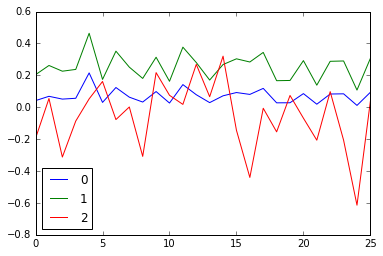

In [44]:
pd.DataFrame(arousalResList).plot()

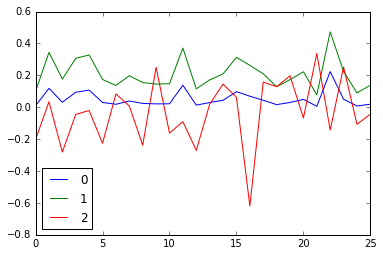

In [45]:
pd.DataFrame(valenceResList).plot()